<h2>Importation des Bibliothèques</h2>

<p>Dans cette section, jai essayé d importer toutes les bibliothèques nécessaires pour la détection et la classification des émotions à partir des images et des séquences vidéo. Les bibliothèques importées incluent :</p>

<ul>
    <li><strong>tensorflow.keras.preprocessing.image.ImageDataGenerator</strong> : Pour générer des lots d images avec des augmentations de données en temps réel.</li>
    <li><strong>keras.models.Sequential</strong> : Pour créer un modèle séquentiel où les couches sont empilées les unes après les autres.</li>
    <li><strong>keras.layers.Dense, Dropout, Flatten</strong> :
        <ul>
            <li><em>Dense</em> : Couche entièrement connectée pour la classification.</li>
            <li><em>Dropout</em> : Régularisation en désactivant aléatoirement des neurones pendant l entraînement.</li>
            <li><em>Flatten</em> : Transforme les données en un vecteur 1D.</li>
        </ul>
    </li>
    <li><strong>keras.layers.Conv2D, MaxPooling2D</strong> :
        <ul>
            <li><em>Conv2D</em> : Applique des filtres de convolution pour extraire des caractéristiques.</li>
            <li><em>MaxPooling2D</em> : Réduit la dimension des données en prenant le maximum dans chaque région d échantillonnage.</li>
        </ul>
    </li>
    <li><strong>os</strong> : Pour interagir avec le système dexploitation, permettant des opérations comme la gestion des fichiers et des répertoires.</li>
    <li><strong>cv2</strong> : (OpenCV) Pour le traitement dimages et de vidéos, permettant de lire, écrire, afficher et manipuler des images et vidéos.</li>
    <li><strong>numpy</strong> : Pour la manipulation de tableaux multidimensionnels et fournir des fonctions mathématiques rapides et efficaces.</li>
    <li><strong>keras.models.load_model</strong> : Pour charger un modèle de réseau de neurones déjà formé à partir d un fichier.</li>
</ul>

<p>Ces bibliothèques sont essentielles pour la mise en œuvre de lapplication de détection et classification des émotions exprimées à travers des expressions faciales.</p>


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
import cv2
import numpy as np
from keras.models import load_model


<h2>Importation des Données</h2>

<p>Dans cette section, jai commencé par importer les données d entraînement et de test. Le répertoire <code>data/train/</code> contient les données d entraînement utilisées pour former le modèle, tandis que le répertoire <code>data/test/</code> contient les données de test utilisées pour évaluer la performance du modèle après l entraînement. Ces étapes sont cruciales pour la mise en place du processus de formation et de validation du modèle de classification des émotions.</p>



In [34]:
train_data_dir='data/train/'
validation_data_dir='data/test/'

<h2>Explication du Générateur de Données</h2>  entraînement de manière artificielle.</p>

In [37]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

In [39]:
validation_datagen = ImageDataGenerator(rescale=1./255)

<p>Dans ce code, nous configurons le générateur de données d entraînement en utilisant les paramètres suivants :</p> 
<ul> <li><strong>train_data_dir</strong> : Le répertoire contenant les données d entraînement.</li> <li><strong>color_mode='grayscale'</strong> : Les images sont converties en niveaux de gris.</li> <li><strong>target_size=(48, 48)</strong> : Les images sont redimensionnées à une taille de 48x48 pixels.</li> <li><strong>batch_size=32</strong> : Le nombre d images dans chaque lot de données.</li> <li><strong>class_mode='categorical'</strong> : Les étiquettes de classe sont codées en utilisant une représentation catégorielle (une hot encoding).</li> <li><strong>shuffle=True</strong> : Les images sont mélangées de manière aléatoire avant chaque époque d entraînement.</li> </ul> <p>Ce générateur permet de charger les images d entraînement en mémoire de manière efficace et d appliquer les transformations définies précédemment.</p>









In [42]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size=32,
					class_mode='categorical',
					shuffle=True)

Found 28709 images belonging to 7 classes.


<p>Dans ce code, nous configurons le générateur de données de validation en utilisant les paramètres suivants :</p> <ul> <li><strong>validation_data_dir</strong> : Le répertoire contenant les données de validation.</li> <li><strong>color_mode='grayscale'</strong> : Les images sont converties en niveaux de gris.</li> <li><strong>target_size=(48, 48)</strong> : Les images sont redimensionnées à une taille de 48x48 pixels.</li> <li><strong>batch_size=32</strong> : Le nombre d images dans chaque lot de données.</li> <li><strong>class_mode='categorical'</strong> : Les étiquettes de classe sont codées en utilisant une représentation catégorielle (one-hot encoding).</li> <li><strong>shuffle=True</strong> : Les images sont mélangées de manière aléatoire avant chaque époque de validation.</li> </ul> <p>Ce générateur permet de charger les images de validation en mémoire de manière efficace et d appliquer les transformations définies précédemment.</p>











In [44]:
validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)

Found 7178 images belonging to 7 classes.


<p>Dans ce code, nous définissons les étiquettes de classe pour les émotions détectées :</p> <ul> <li><strong>class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']</strong> : Cette liste contient les noms des classes d émotions que le modèle doit détecter et classifier.</li> </ul> <p>Ensuite, nous utilisons la méthode <code>__next__()</code> pour obtenir un lot d'images et leurs étiquettes depuis le générateur de données d'entraînement :</p> <ul> <li><strong>img, label = train_generator.__next__()</strong> : Cette ligne de code récupère un lot d'images et leurs étiquettes associées depuis le générateur <code>train_generator</code>. Cela permet de vérifier que les images et les étiquettes sont correctement chargées et prêtes pour l'entraînement.</li> </ul>

In [47]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()


<p>Dans ce code, nous initialisons un modèle séquentiel en utilisant la classe <code>Sequential</code> de Keras :</p> <ul> <li><strong>model = Sequential()</strong> : Cette ligne de code crée une instance d un modèle séquentiel. Un modèle séquentiel permet de construire des réseaux de neurones en empilant des couches les unes après les autres. C est une manière simple et intuitive de créer des modèles en ajoutant chaque couche étape par étape.</li> </ul>

In [51]:
model = Sequential()

<p>Dans ce code, nous ajoutons plusieurs couches au modèle séquentiel :</p> <ul> <li><strong>Conv2D</strong> : Couches convolutives pour extraire des caractéristiques des images d entrée.</li> <li><strong>MaxPooling2D</strong> : Couches de sous-échantillonnage pour réduire la taille des cartes de caractéristiques.</li> <li><strong>Dropout</strong> : Couches de régularisation pour prévenir le surapprentissage.</li> <li><strong>Flatten</strong> : Aplati les données en un vecteur 1D.</li> <li><strong>Dense</strong> : Couches entièrement connectées pour la classification.</li> <li><strong>Compile</strong> : Compilation du modèle avec l'optimiseur Adam, la fonction de perte 'categorical_crossentropy' et l'évaluation de la métrique 'accuracy'.</li> </ul> <p>Nous ajoutons plusieurs couches convolutives, de sous-échantillonnage et de régularisation pour extraire les caractéristiques des images. Ensuite, nous aplatissons les données et ajoutons des couches entièrement connectées pour effectuer la classification finale.

In [54]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [55]:

train_path = "data/train/"
test_path = "data/test"


<h2>Détection et Classification des Émotions</h2> <p>Le modèle de réseau de neurones pré-entraîné est chargé et utilisé pour détecter et classifier les émotions sur les visages dans une image. Les visages sont détectés à l aide du classificateur de  OpenCV, prétraités et normalisés, puis passés au modèle pour prédiction. Les résultats de classification sont affichés sur l image originale avec des rectangles et des étiquettes indiquant les émotions détectées.</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2


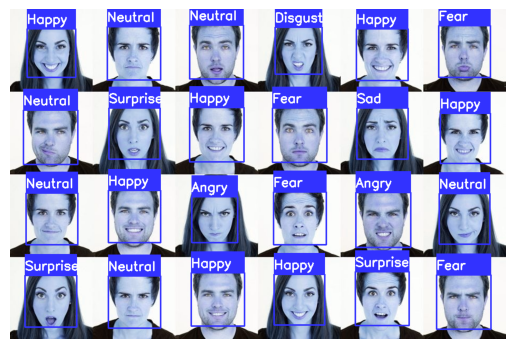

In [59]:
model=load_model('model_file_30epochs.h5')

faceDetect=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

labels_dict={0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

# len(number_of_image), image_height, image_width, channel

frame=cv2.imread("faces.jpeg")
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces= faceDetect.detectMultiScale(gray, 1.3, 3)
for x,y,w,h in faces:
    sub_face_img=gray[y:y+h, x:x+w]
    resized=cv2.resize(sub_face_img,(48,48))
    normalize=resized/255.0
    reshaped=np.reshape(normalize, (1, 48, 48, 1))
    result=model.predict(reshaped)
    label=np.argmax(result, axis=1)[0]
    print(label)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 1)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(50,50,255),2)
    cv2.rectangle(frame,(x,y-40),(x+w,y),(50,50,255),-1)
    cv2.putText(frame, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
plt.imshow(frame)
plt.axis('off')  
plt.show()